In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [51]:
import nltk
import csv
from textblob import TextBlob
with open('data_cleaned.csv', 'r') as fp:
     content = fp.read()
blob = TextBlob(content)
import pandas as pd
import sys

In [52]:
df = pd.read_csv('data_cleaned.csv')
df = df.drop(columns=['DOCID','name','date_created','handle'],axis=1)
df = pd.DataFrame(df)
df.head(5)

,body
0,Govt outlines $200m support for Auckland Counc...
1,Maxwell doesn't deserve 'special treatment' de...
2,.@TheAMShowNZ's #poll: Do you eat 5 or more se...
3,'I felt so 'normal' again': White Island survi...
4,#BREAKING: Todd Muller resigns as National Par...


In [53]:
def sentiment_calc(text):
    try:
        return TextBlob(text).polarity
    except:
        return None

def sentiment(text):
    try:
        return TextBlob(text).subjectivity
    except:
        return None
    
df['polarity'] = df['body'].apply(sentiment_calc)
df['subjectivity'] = df['body'].apply(sentiment)

df.head(5)

,body,polarity,subjectivity
0,Govt outlines $200m support for Auckland Counc...,0.000000,0.000000
1,Maxwell doesn't deserve 'special treatment' de...,0.357143,0.571429
2,.@TheAMShowNZ's #poll: Do you eat 5 or more se...,0.500000,0.500000
3,'I felt so 'normal' again': White Island survi...,0.075000,0.325000
4,#BREAKING: Todd Muller resigns as National Par...,0.000000,0.000000


In [54]:
if sys.version[0] == '3':
    from importlib import reload
    sntTweets = csv.writer(open("Deloitte Team 2 Twitter data 2 July MvN cleaned.csv", "w", newline=''))

if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")
    sntTweets = csv.writer(open("Deloitte Team 2 Twitter data 2 July MvN cleaned.csv", "w"))

alltweets = csv.reader(open("Deloitte Team 2 Twitter data 2 July MvN cleaned.csv", 'r'))

for row in alltweets:
    blob = TextBlob(row[2])
    print (blob.sentiment.polarity)
    if blob.sentiment.polarity > 0:
        sntTweets.writerow([row[0], row[1], row[2], row[3], blob.sentiment.polarity, "positive"])
    elif blob.sentiment.polarity < 0:
        sntTweets.writerow([row[0], row[1], row[2], row[3], blob.sentiment.polarity, "negative"])
    elif blob.sentiment.polarity == 0.0:
        sntTweets.writerow([row[0], row[1], row[2], row[3], blob.sentiment.polarity, "neutral"])

In [55]:
df['sentiment'] = df.polarity.apply(lambda x: 'positive' if x > 0.1 else 'negative' if x < -0.1 else 'neutral')
df.head(10)

,body,polarity,subjectivity,sentiment
0,Govt outlines $200m support for Auckland Counc...,0.000000,0.000000,neutral
1,Maxwell doesn't deserve 'special treatment' de...,0.357143,0.571429,positive
2,.@TheAMShowNZ's #poll: Do you eat 5 or more se...,0.500000,0.500000,positive
3,'I felt so 'normal' again': White Island survi...,0.075000,0.325000,neutral
4,#BREAKING: Todd Muller resigns as National Par...,0.000000,0.000000,neutral
5,Live updates: Todd Muller resigns as National ...,0.136364,0.500000,positive
6,'Open for business': Quarantine-free travel bu...,-0.050000,0.450000,neutral
7,'Compelling' evidence COVID-19 cases increase ...,0.300000,0.600000,positive
8,'I am shocked': The AM Show hosts react to Tod...,-0.700000,0.800000,negative
9,Poll: Who should be the next National Party le...,0.000000,0.000000,neutral


In [56]:
df['sentiment']

#positive
search_word = 'positive'  
# Check if each title contains the specified word and then count
counts_positive = df['sentiment'].str.contains(search_word).sum()

counts_positive

859

In [57]:
#negative
df['sentiment']
search_word = 'negative'  
counts_negative = df['sentiment'].str.contains(search_word).sum()

counts_negative

168

In [58]:
#neutral
df['sentiment']
search_word = 'neutral'  
counts_neutral = df['sentiment'].str.contains(search_word).sum()

counts_neutral 

803

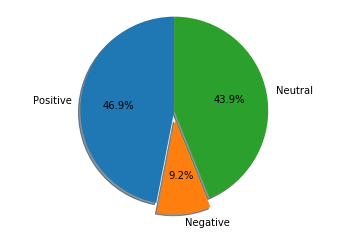

In [59]:
import matplotlib.pyplot as plt

labels = 'Positive', 'Negative', 'Neutral'
sizes = [counts_positive, counts_negative, counts_neutral]

# set the separation distance. 0 means no separation
explode = (0, 0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# equal aspect ratio 
plt.axis('equal') 

plt.show()